In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [4]:
iris = load_iris()
X = iris.data[:, :2]  
y = iris.target

In [5]:
X = X[y != 2]
y = y[y != 2]
y = np.where(y == 0, -1, 1)  # Relabel for SVM: Setosa -> -1, Versicolor -> +1

In [6]:
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

SVC(kernel='linear')

In [7]:
w = clf.coef_[0]
b = clf.intercept_[0]
slope = -w[0] / w[1]
intercept = -b / w[1]
margin = 1 / np.sqrt(np.sum(w ** 2))

In [8]:
print("Support Vectors:")
print(clf.support_vectors_)


Support Vectors:
[[4.9 3. ]
 [5.7 3.8]
 [5.4 3.4]
 [5.  3. ]
 [5.4 3.4]
 [5.5 3.5]
 [4.5 2.3]
 [4.8 3. ]
 [4.9 2.4]
 [5.2 2.7]
 [5.6 3. ]
 [5.9 3.2]
 [5.4 3. ]
 [6.  3.4]
 [5.6 3. ]
 [5.1 2.5]]


In [9]:
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
decision_boundary = slope * x_vals + intercept
margin_up = decision_boundary + margin
margin_down = decision_boundary - margin


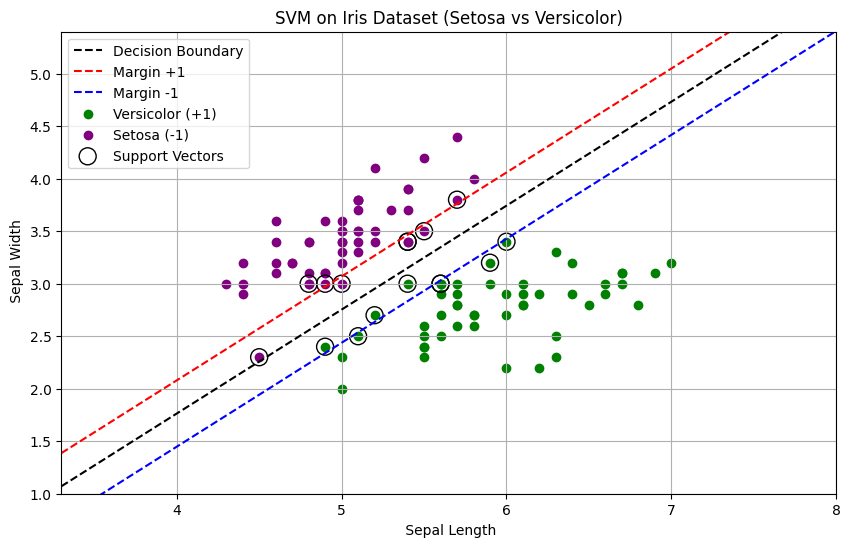

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, decision_boundary, 'k--', label='Decision Boundary')
plt.plot(x_vals, margin_up, 'r--', label='Margin +1')
plt.plot(x_vals, margin_down, 'b--', label='Margin -1')
# Plot the data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Versicolor (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='purple', label='Setosa (-1)')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=150, facecolors='none', edgecolors='black', label='Support Vectors')
# Labels and aesthetics
plt.xlabel(' Sepal Length')
plt.ylabel(' Sepal Width')
plt.title('SVM on Iris Dataset (Setosa vs Versicolor)')
plt.legend()
plt.grid(True)
plt.xlim(x_vals.min(), x_vals.max())
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.show()
